In [2]:
#============================================================================================
# Compare Algorithms to determine which algorithms should be tuned
# dataset file: diabetes_data_upload.csv
# URL: https://archive.ics.uci.edu/ml/datasets/Early+stage+diabetes+risk+prediction+dataset
# https://github.com/BayesWitnesses/m2cgen to convert model to Python, Java and C
#============================================================================================
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import model_selection

# Classifier list
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB

from sklearn import ensemble
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

#--------------------------------------------------------------------------------------------------
class MultiColumnLabelEncoder:
    def __init__(self, columns = None):
        self.columns = columns # array of column names to encode

    def fit(self, X, y = None):
        return self # not relevant here

    def transform(self,X):
        '''
        Transforms columns of X specified in self.columns using
        LabelEncoder(). If no columns specified, transforms all
        columns in X.
        '''
        output = X.copy()
        if self.columns is not None:
            for col in self.columns:
                output[col] = LabelEncoder().fit_transform(output[col])
        else:
            for colname,col in output.iteritems():
                output[colname] = LabelEncoder().fit_transform(col)
        return output

    def fit_transform(self, X, y = None):
        return self.fit(X, y).transform(X)

#--------------------------------------------------------------------------------------------------
df = pd.read_csv('diabetes_data_upload.csv')
train_set, test_set = train_test_split(df, test_size = 0.20, shuffle = True,  random_state = 22)
#--------------------------------------------------------------------------------------------------

encoding_pipeline = Pipeline([
    ('encoding', MultiColumnLabelEncoder(columns=['Polyuria', 'Polydipsia', 'sudden weight loss', 'weakness', 
                                                 'Polyphagia', 'Genital thrush', 'visual blurring', 'Itching', 
                                                 'Irritability', 'delayed healing', 'partial paresis', 
                                                 'muscle stiffness', 'Alopecia', 'Obesity']))
    
])


enc_attribs = ['Polyuria', 'Polydipsia', 'sudden weight loss',	'weakness',	
               'Polyphagia',	'Genital thrush',	'visual blurring',	'Itching',	
               'Irritability',	'delayed healing',	'partial paresis',	
               'muscle stiffness',	'Alopecia',	'Obesity']
num_attribs = ['Age']
cat_attribs = list(train_set[["Gender"]])

full_pipeline = ColumnTransformer([                           
        ("num", StandardScaler(), num_attribs), 
        ("cat", OneHotEncoder(), cat_attribs),  # expanded -> [0, 1]
        ("encoding", encoding_pipeline, enc_attribs)
    ], remainder='passthrough')

#--------------------------------------------------------------------------------------------

X_train = train_set.drop("class", axis=1) # drop labels for training set
y_train = train_set["class"].copy().values # np array
X_train_mapped = full_pipeline.fit_transform(X_train) # np array

#--------------------------------------------------------------------------------------------

# prepare models
models = []
models.append(('ADA',AdaBoostClassifier()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('LR', LogisticRegression()))
models.append(('NN',MLPClassifier()))
models.append(('RF',RandomForestClassifier()))
models.append(('SGD',SGDClassifier()))
models.append(('SVC',SVC()))

#--------------------------------------------------------------------------------------------

In [3]:
results1 = []
names = []
scoring = 'f1_macro'
for name, model in models:
    kfold = model_selection.KFold(n_splits=5, shuffle = True, random_state = 321)
    cv_results = model_selection.cross_val_score(model, X_train_mapped, y_train, cv=kfold, scoring=scoring)
    results1.append(cv_results)
    names.append(name)
    #print("kfold=", kfold)
    msg = "f1_macro: %s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

results2 = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=5, shuffle = True, random_state = 321)
    cv_results = model_selection.cross_val_score(model, X_train_mapped, y_train, cv=kfold, scoring=scoring)
    results2.append(cv_results)
    names.append(name)
    #print("kfold=", kfold)
    msg = "accuracy: %s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)



f1_macro: ADA: 0.917009 (0.027296)
f1_macro: DT: 0.961234 (0.011840)
f1_macro: KNN: 0.919466 (0.039655)
f1_macro: LR: 0.938377 (0.019267)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, Conv

f1_macro: NN: 0.951459 (0.010478)
f1_macro: RF: 0.971603 (0.005983)
f1_macro: SGD: 0.915815 (0.017815)
f1_macro: SVC: 0.953970 (0.019169)
accuracy: ADA: 0.923121 (0.022152)
accuracy: DT: 0.959151 (0.009555)
accuracy: KNN: 0.923207 (0.036548)
accuracy: LR: 0.942312 (0.017690)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, Conv

accuracy: NN: 0.954360 (0.008788)
accuracy: RF: 0.980780 (0.005856)
accuracy: SGD: 0.913483 (0.029832)
accuracy: SVC: 0.956741 (0.018003)


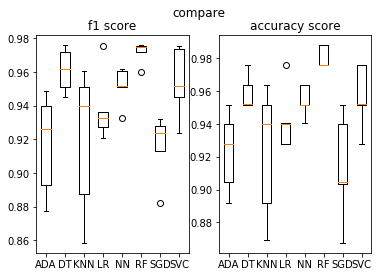

In [4]:
# boxplot algorithm comparison
fig = plt.figure()
ax = fig.add_subplot(121)
fig.suptitle('compare')
plt.boxplot(results1)
ax.set_xticklabels(names)
ax.set_title("f1 score")

ax = fig.add_subplot(122)
plt.boxplot(results2)
ax.set_xticklabels(names)
ax.set_title("accuracy score")
plt.show()

In [5]:
clf_saved_models = []
def fit_model (use_algorithm_name, use_algorithm, XX_train, yy_train):
    parameters = ""
    if use_algorithm_name =='LR':
        clf__penalty_param= ['l1', 'l2']
        clf__C_param= [0.001, 0.01, 0.1, 1, 10, 100, 1000] 
        clf_fit_intercept=[True, False] 
        parameters = {'C':clf__C_param, 'penalty':clf__penalty_param,'fit_intercept':clf_fit_intercept} 
    elif use_algorithm_name == 'ADA':
        clf_learning_rate=[0.1, 0.5, 1.0, 10.0]
        clf_n_estimators=[10, 50]
        parameters = {'learning_rate': clf_learning_rate, 'n_estimators': clf_n_estimators}
    elif use_algorithm_name =='RF':
        n_estimators_values = [50, 100, 200, 300, 400]
        #min_impurity_decrease_values = [0., 0.005, 0.00025]
        #max_features_params = [0.1, 0.25, 0.5, 0.75, 'sqrt', 'log2', None]
        criterion_params = ['gini', 'entropy']
        #parameters = {'criterion': criterion_params, 'max_features': max_features_params,'n_estimators': n_estimators_values}
        parameters = {'criterion': criterion_params, 'n_estimators': n_estimators_values}
    elif use_algorithm_name == 'DT':
        criterion_params = ['gini','entropy']
        max_features_params = ['auto','sqrt','log2'] 
        parameters = {'criterion': criterion_params, 'max_features': max_features_params}
    elif use_algorithm_name=='NN':
        learning_rate=['constant', 'invscaling', 'adaptive']
        activation = ['identity', 'logistic', 'tanh', 'relu']
        learningrate_params = [0.01, 0.05, 0.1, 0.5, 1.0] 
        parameters = {'learning_rate': learning_rate, 'activation': activation, 'learning_rate_init': learningrate_params}
    elif use_algorithm_name=='SGD':
        fit_intercept=[True, False]
        l1_ratio=[0, 0.15, 1.0]
        loss_params=['log','modified_huber']
        parameters = {'fit_intercept': fit_intercept, 'l1_ratio': l1_ratio, 'loss': loss_params}
    elif use_algorithm_name=='SVC':
        kernel=['linear', 'sigmoid', 'rbf']
        parameters = {'kernel':kernel}
    elif use_algorithm_name=='KNN':
        metric_params = ['minkowski','euclidean','manhattan'] 
        weights_params = ['uniform','distance'] 
        numNeighbors_params  = [5, 6, 7, 8, 9]
        parameters = {'metric': metric_params, 'weights': weights_params, 'n_neighbors': numNeighbors_params}
        
    if type(parameters) != str:
        model = GridSearchCV(use_algorithm, parameters, cv=5).fit(XX_train, yy_train)
        clf_saved_models.append(model)
        print(model)
        


In [6]:
#fit_model('ADA', AdaBoostClassifier(), X_train_mapped, y_train)
#fit_model('DT', DecisionTreeClassifier(), X_train_mapped, y_train)
#fit_model('KNN', KNeighborsClassifier(), X_train_mapped, y_train)
#fit_model('LR', LogisticRegression(), X_train_mapped, y_train)
#fit_model('NN', MLPClassifier(), X_train_mapped, y_train)
fit_model('RF', RandomForestClassifier(), X_train_mapped, y_train)
#fit_model('SGD', SGDClassifier(), X_train_mapped, y_train)
fit_model('SVC', SVC(probability=False), X_train_mapped, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [7]:
clf_saved_models

[GridSearchCV(cv=5, error_score=nan,
              estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                               class_weight=None,
                                               criterion='gini', max_depth=None,
                                               max_features='auto',
                                               max_leaf_nodes=None,
                                               max_samples=None,
                                               min_impurity_decrease=0.0,
                                               min_impurity_split=None,
                                               min_samples_leaf=1,
                                               min_samples_split=2,
                                               min_weight_fraction_leaf=0.0,
                                               n_estimators=100, n_jobs=None,
                                               oob_score=False,
                                     

In [8]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

clf = clf_saved_models[0]  # 'RF'
y_train_predict = clf.predict(X_train_mapped)
accuracy_score(y_train, y_train_predict)

1.0

[[162   0]
 [  0 254]]


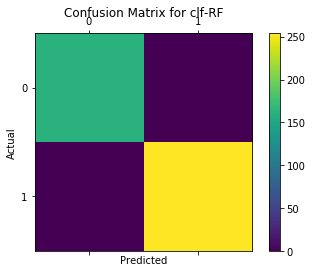

In [9]:
cm = confusion_matrix(y_train, y_train_predict)
print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion Matrix for clf-RF')
fig.colorbar(cax)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [10]:
clf = clf_saved_models[1]  # 'SVC'
y_train_predict = clf.predict(X_train_mapped)
accuracy_score(y_train, y_train_predict)

0.9831730769230769

[[157   5]
 [  2 252]]


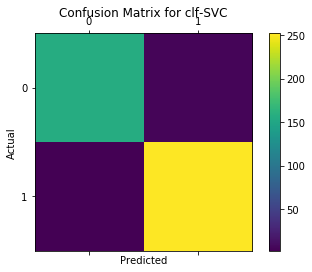

In [11]:
cm = confusion_matrix(y_train, y_train_predict)
print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion Matrix for clf-SVC')
fig.colorbar(cax)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [12]:
X_test = test_set.drop("class", axis=1) # drop labels for testing set
y_test = test_set["class"].copy().values
full_pipeline = ColumnTransformer([                           
        ("num", StandardScaler(), num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
        ("encoding", encoding_pipeline, enc_attribs)
    ], remainder='passthrough')

clf = clf_saved_models[0]  # 'RF'
X_test_mapped = full_pipeline.fit_transform(X_test)
y_test_predict = clf.predict(X_test_mapped)
accuracy_score(y_test, y_test_predict)

0.9807692307692307

[[37  1]
 [ 1 65]]


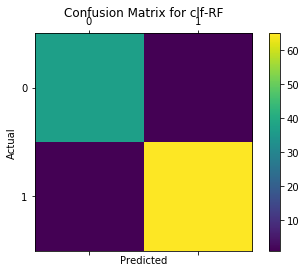

In [13]:
cm = confusion_matrix(y_test, y_test_predict)
print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion Matrix for clf-RF')
fig.colorbar(cax)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [14]:
clf = clf_saved_models[1]  # 'SVC'
X_test_mapped = full_pipeline.fit_transform(X_test)
y_test_predict = clf.predict(X_test_mapped)
accuracy_score(y_test, y_test_predict)

0.9519230769230769

[[36  2]
 [ 3 63]]


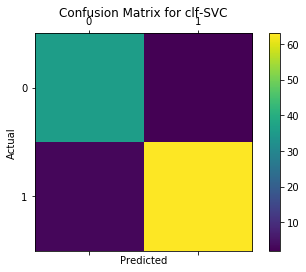

In [15]:
cm = confusion_matrix(y_test, y_test_predict)
print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion Matrix for clf-SVC')
fig.colorbar(cax)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [16]:
import pickle
filename_model_RF = "model_RF.pkl"
pickle.dump(clf_saved_models[0].best_estimator_, open(filename_model_RF, 'wb'), protocol = 4)

In [17]:
filename_model_SVC = "model_SVC.pkl"
pickle.dump(clf_saved_models[1].best_estimator_, open(filename_model_SVC, 'wb'), protocol = 4)

In [18]:
model_RF = pickle.load(open(filename_model_RF, 'rb'))

In [19]:
model_SVC = pickle.load(open(filename_model_SVC, 'rb'))

In [20]:
clf = model_RF  # 'RF'
X_test_mapped = full_pipeline.fit_transform(X_test)
y_test_predict = clf.predict(X_test_mapped)
accuracy_score(y_test, y_test_predict)

0.9807692307692307

[[37  1]
 [ 1 65]]


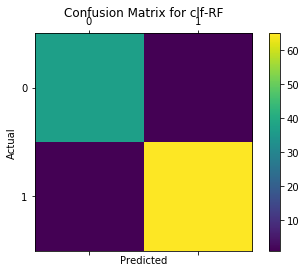

In [21]:
cm = confusion_matrix(y_test, y_test_predict)
print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion Matrix for clf-RF')
fig.colorbar(cax)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [26]:
clf = model_RF  # 'RF'
X_test_mapped = full_pipeline.fit_transform(X_test)
y_test_predict = clf.predict(X_test_mapped[0:10, :])
y_test_predict

array(['Positive', 'Positive', 'Positive', 'Positive', 'Negative',
       'Positive', 'Negative', 'Negative', 'Positive', 'Negative'],
      dtype=object)

In [27]:
y_test_predict = clf.predict_proba(X_test_mapped[0:10, :])
print(y_test_predict)

[[0.   1.  ]
 [0.07 0.93]
 [0.1  0.9 ]
 [0.04 0.96]
 [1.   0.  ]
 [0.44 0.56]
 [0.95 0.05]
 [0.51 0.49]
 [0.01 0.99]
 [0.99 0.01]]


In [30]:
clf = model_RF  # 'RF'


In [31]:
import m2cgen as m2c  # if m2cgen is installed, then enable following cells


pcode = m2c.export_to_python(clf)
jcode = m2c.export_to_java(clf)
ccode = m2c.export_to_c(clf)

file = open("m2cgen_clf_rf.py", "w") 
file.write(pcode) 
file.close() 

file = open("m2cgen_clf_rf.java", "w") 
file.write(jcode) 
file.close() 

file = open("m2cgen_clf_rf.c", "w") 
file.write(ccode) 
file.close() 


In [32]:

from m2cgen_clf_rf import score
print("test results from generated python code:")
y_test_predict = []
i = 0
for i in range(0, 10):
    sample = X_test_mapped[i]
    y = score(sample)
    y_test_predict.append(y)

print(y_test_predict)


test results from generated python code:
[[0.0, 1.0], [0.07, 0.93], [0.1, 0.9], [0.04, 0.96], [1.0, 0.0], [0.44, 0.56], [0.9500000000000001, 0.05], [0.51, 0.49], [0.01, 0.99], [0.99, 0.01]]
